# Heart Disease Prediction System

#### import necessary libraries

In [81]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [37]:
df = pd.read_csv(r'C:\Users\aitip\Downloads\heart.csv') 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [39]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
df = df.apply(pd.to_numeric,errors='coerce')
df = df.astype(float)

In [42]:
df.shape

(1025, 14)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   float64
 2   cp        1025 non-null   float64
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   float64
 6   restecg   1025 non-null   float64
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   float64
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   float64
 11  ca        1025 non-null   float64
 12  thal      1025 non-null   float64
 13  target    1025 non-null   float64
dtypes: float64(14)
memory usage: 112.2 KB


In [44]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df['target'].value_counts()

target
1.0    526
0.0    499
Name: count, dtype: int64

In [46]:
X = df.drop(columns='target',axis=1)
Y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0


In [47]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1020    1.0
1021    0.0
1022    0.0
1023    1.0
1024    0.0
Name: target, Length: 1025, dtype: float64

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [49]:
X_train.shape

(820, 13)

In [50]:
X_test.shape

(205, 13)

In [51]:
Y_train.shape

(820,)

In [52]:
Y_test.shape

(205,)

### Logistic Regression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train,Y_train)# look into the documentation 
y_pred=model.predict(X_test)
y_pred

C:\navigator\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1.])

In [56]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,y_pred)
acc

0.8048780487804879

<Axes: >

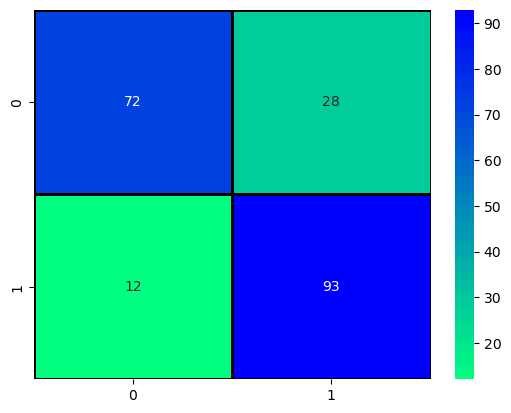

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="winter_r",linewidth=2,linecolor="k")

In [61]:
from sklearn.metrics import classification_report
report=classification_report(Y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78       100
         1.0       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### Decisiontree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4,min_samples_split=3,min_samples_leaf=1)
dtree.fit(X_train,Y_train)
d_pred=dtree.predict(X_test)
d_pred

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0.])

In [63]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,d_pred)
acc

0.8585365853658536

<Axes: >

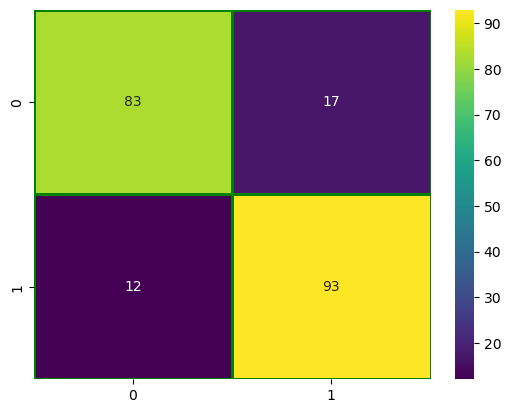

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,d_pred)
sns.heatmap(cm,annot=True,cmap="viridis",linewidth=2,linecolor="green")

In [66]:
from sklearn.metrics import classification_report
report=classification_report(Y_test,d_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       100
         1.0       0.85      0.89      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



### RandomForest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rndf=RandomForestClassifier(n_estimators=150)
rndf.fit(X_train,Y_train)
r_pred=rndf.predict(X_test)
r_pred

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0.])

In [68]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,r_pred)
acc

1.0

<Axes: >

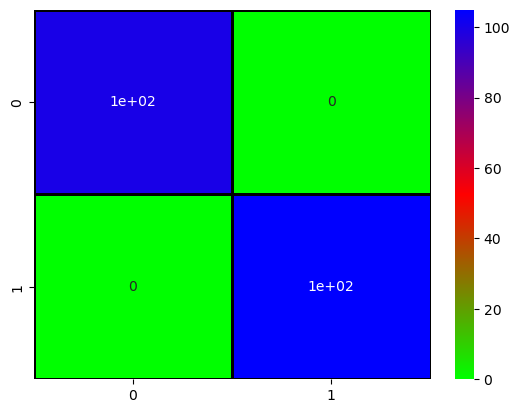

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,r_pred)
sns.heatmap(cm,annot=True,cmap="brg_r",linewidth=2,linecolor="k")

In [72]:
from sklearn.metrics import classification_report
report=classification_report(Y_test,r_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [73]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'This is the accuracy score on training data {training_data_accuracy}')

This is the accuracy score on training data 0.848780487804878


In [74]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'This is the accuracy score on testing data {testing_data_accuracy}')

This is the accuracy score on testing data 0.8048780487804879


In [75]:
training_data_accuracy - testing_data_accuracy

0.04390243902439017

In [76]:
# Building a model 
# Input
target = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# Converting the input list to numpy array.
target = np.array(target)
print(target)
print(type(target))
target = target.reshape(1,-1) 
target 

prediction = model.predict(target)

if prediction[0] == 0 : 
    print("Good News Patient does'nt have heart disease")
else: 
    print("Oh! Patient should visit the doctor") 
    

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]
<class 'numpy.ndarray'>
Good News Patient does'nt have heart disease


C:\navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Saving the trained model

In [77]:
import pickle
filename = 'Trained_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [78]:
# Loading the saved model
loaded_model = pickle.load(open('Trained_model.pkl','rb'))                     


In [79]:
target = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# Converting the input list to numpy array.
target = np.array(target)
print(target)
print(type(target))
target = target.reshape(1,-1) 
target 

prediction = loaded_model.predict(target)

if prediction[0] == 0 : 
    print("Good News Patient does'nt have heart disease")
else: 
    print("Oh! Patient should visit the doctor") 
    

[ 62.    0.    0.  140.  268.    0.    0.  160.    0.    3.6   0.    2.
   2. ]
<class 'numpy.ndarray'>
Good News Patient does'nt have heart disease


C:\navigator\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
